In [1]:
# Validation
import matplotlib
import pickle
from analysis import simulation_analysis
import numpy as np


# Plot parameters
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
matplotlib.rcParams['lines.linewidth'] = 0.8
matplotlib.rcParams["mathtext.fontset"] = "dejavusans"

smark = 12
gline = 0.5
rline = 1.2
lfont = 14



spheres = pickle.load(open('sphere/spheres.obj', 'rb'))
ellipsoids3 = pickle.load(open('ellipsoids/ellipsoids.obj', 'rb'))
big_sphere = pickle.load(open('sphere/big_sphere.obj', 'rb'))
big_ellipsoid = pickle.load(open('ellipsoids/big_ellipsoid.obj', 'rb'))


ellipsoid3 = pickle.load(open('ellipsoids/ellipsoid3.obj', 'rb'))
ellipsoid6 = pickle.load(open('ellipsoids/ellipsoid6.obj', 'rb'))
ellipsoid9 = pickle.load(open('ellipsoids/ellipsoid9.obj', 'rb'))


sphere15 = pickle.load(open('point source/sphere15.obj', 'rb'))
sphere20 = pickle.load(open('point source/sphere20.obj', 'rb'))
sphere25 = pickle.load(open('point source/sphere25.obj', 'rb'))
sphere30 = pickle.load(open('point source/sphere30.obj', 'rb'))


sc3 = pickle.load(open('spherocylinders/scylinder3.obj', 'rb'))
sc6 =  pickle.load(open('spherocylinders/scylinder6.obj', 'rb'))
sc9 =  pickle.load(open('spherocylinders/scylinder9.obj', 'rb'))

AttributeError: Can't get attribute 'sim1_tm' on <module '__main__'>

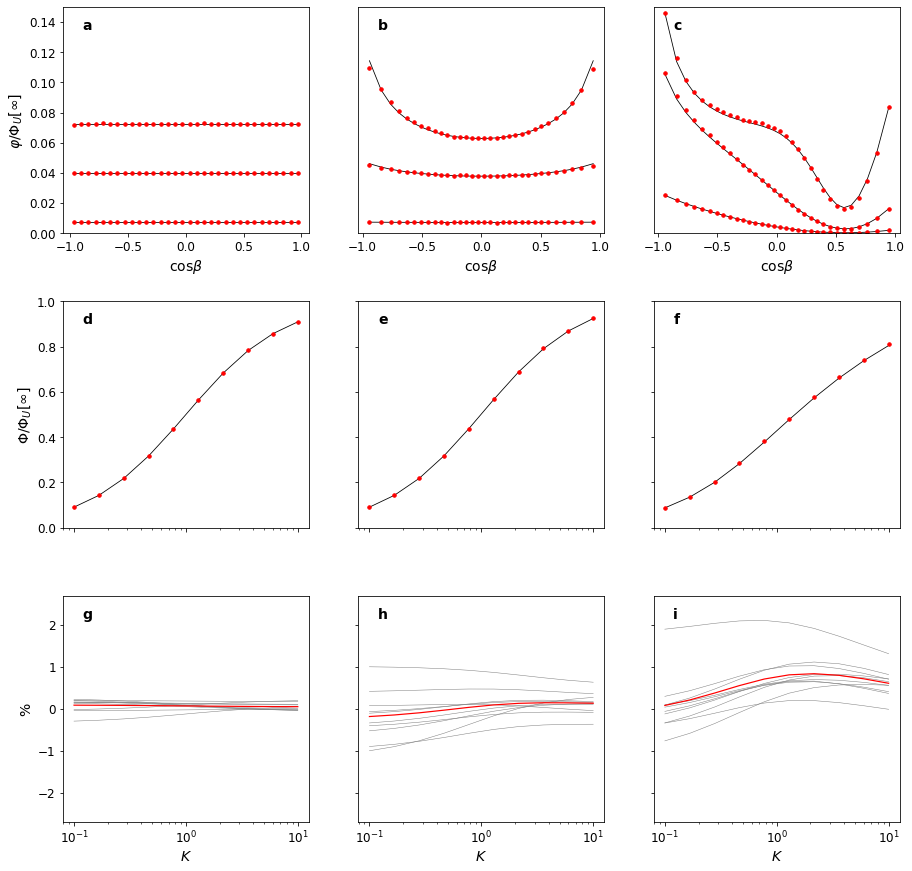

In [81]:
# Non uniform ellipsoid distribution

K = 1
k0 = 0.08769475557579724*4*np.pi
k1 = -0.14540754677996248*4*np.pi
k2 = 0.08351803948640363*4*np.pi

costheta = big_ellipsoid.midpoints/big_ellipsoid.settings["ez"]
k_t = K*(k0 +k1*eval_legendre(1,costheta) +k2*eval_legendre(2,costheta))
#plt.plot(costheta,k_t)
#plt.xlabel(r"cos($\theta$)")
#plt.ylabel(r"k")


## non uniform ellipsoid local fluxes from mathematica

flx01 = [0.31587, 0.275488, 0.246507, 0.222524, 0.201633, 0.182929, 0.1659, 
  0.150225, 0.13569, 0.122149, 0.109495, 0.0976526, 0.0865659, 
  0.0761957, 0.0665141, 0.0575033, 0.049153, 0.0414602, 0.0344279, 
  0.028065, 0.0223867, 0.0174144, 0.0131772, 0.00971303, 0.00707166, 
  0.00531869, 0.00454294, 0.00486952, 0.00648563, 0.0096996, 
  0.0151137, 0.024563]


flx1 = [1.32579, 1.11822, 1.00419, 0.922633, 0.857333, 0.801322, 0.750938, 
  0.704031, 0.659247, 0.615699, 0.572801, 0.530186, 0.487645, 
  0.445108, 0.402615, 0.360311, 0.318436, 0.277323, 0.23739, 0.199137,
   0.163146, 0.130073, 0.10065, 0.0756869, 0.056073, 0.0427994, 
  0.0369959, 0.0400151, 0.0536202, 0.0804478, 0.125437, 0.203875]


flx10 = [1.83588, 1.42937, 1.26311, 1.16551, 1.10013, 1.05313, 1.01775, 
  0.990299, 0.968454, 0.950575, 0.935344, 0.9216, 0.908204, 0.893918, 
  0.87731, 0.85671, 0.830224, 0.795825, 0.751562, 0.695911, 0.628307, 
  0.549815, 0.463847, 0.376714, 0.29777, 0.238922, 0.213386, 0.233917,
   0.311209, 0.454079, 0.67618, 1.04401]

# Non uniform ellipsoid total flux for K= np.logspace(-1,1,10)
nu_tflux = [0.0876388,0.135171,0.200571,0.283321,0.378383,0.477584,0.573148,0.660346,0.7375,0.804427]



def sphere_flux(k):
    return k/(1+k)
def sphere_flux_density(k):
    return (k/(1+k))/(4*np.pi)

import matplotlib
import matplotlib.transforms as mtransforms

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

fig, axs = plt.subplots(3, 3,figsize=(15, 15))

#FIRST ROW -----------------------------
# local flux for different K values


# axs[0,0].text(0.05,0.9, "sphere", horizontalalignment='left',verticalalignment='center', transform=axs[0,0].transAxes)
# axs[0,1].text(0.05,0.9,  r"spheroid H", horizontalalignment='left',verticalalignment='center', transform=axs[0,1].transAxes)
# axs[0,2].text(0.05,0.9,  r"spheroid I", horizontalalignment='left',verticalalignment='center', transform=axs[0,2].transAxes)


costheta_el = big_ellipsoid.midpoints/big_ellipsoid.settings["ez"]
costheta_sp = big_sphere.midpoints


K = 0.1

axs[0,0].scatter(costheta_sp,big_sphere.get_flux_density(K*np.ones(32)),color = "red",s=smark,zorder=2)
axs[0,0].plot(costheta_sp,np.ones_like(costheta_sp)*sphere_flux_density(K),color = "black",linewidth=wline,zorder=0)

axs[0,1].scatter(costheta_el,big_ellipsoid.get_flux_density(K*np.ones(32)),s=smark,color = "red",zorder=2)
axs[0,1].plot(costheta_el,np.array([-fl_loc(big_ellipsoid,K,ct,5)/(4*np.pi) for ct in costheta_el]),color = "black",linewidth=wline,zorder=0)

axs[0,2].scatter(costheta_el,big_ellipsoid.get_flux_density(K*k_t),color = "red",s=smark,zorder=2)
axs[0,2].plot(costheta_el,np.array(flx01)/(4*np.pi),color = "black",linewidth=wline,zorder=0)


K = 1.0

axs[0,0].scatter(costheta_sp,big_sphere.get_flux_density(K*np.ones(32)),color = "red",s=smark,zorder=2)
axs[0,0].plot(costheta_sp,np.ones_like(costheta_sp)*sphere_flux_density(K),color = "black",linewidth=wline,zorder=0)

axs[0,1].scatter(costheta_el,big_ellipsoid.get_flux_density(K*np.ones(32)),s=smark,color = "red",zorder=2)
axs[0,1].plot(costheta_el,np.array([-fl_loc(big_ellipsoid,K,ct,5)/(4*np.pi) for ct in costheta_el]),color = "black",linewidth=wline,zorder=0)

axs[0,2].scatter(costheta_el,big_ellipsoid.get_flux_density(K*k_t),color = "red",s=smark,zorder=2)
axs[0,2].plot(costheta_el,np.array(flx1)/(4*np.pi),color = "black",linewidth=wline,zorder=0)

K = 10

axs[0,0].scatter(costheta_sp,big_sphere.get_flux_density(K*np.ones(32)),color = "red",s=smark,zorder=2)
axs[0,0].plot(costheta_sp,np.ones_like(costheta_sp)*sphere_flux_density(K),color = "black",linewidth=wline,zorder=0)

axs[0,1].scatter(costheta_el,big_ellipsoid.get_flux_density(K*np.ones(32)),s=smark,color = "red",zorder=2)
axs[0,1].plot(costheta_el,np.array([-fl_loc(big_ellipsoid,K,ct,5)/(4*np.pi) for ct in costheta_el]),color = "black",linewidth=wline,zorder=0)

axs[0,2].scatter(costheta_el,big_ellipsoid.get_flux_density(K*k_t),color = "red",s=smark,zorder=2)
axs[0,2].plot(costheta_el,np.array(flx10)/(4*np.pi),color = "black",linewidth=wline,zorder=0)


axs[0,0].set_ylabel(r"$\varphi/\Phi_U [\infty]$",fontsize=lfont)

axs[0,0].set_xlabel(r"$\cos \beta$",fontsize=lfont)
axs[0,1].set_xlabel(r"$\cos \beta$",fontsize=lfont)
axs[0,2].set_xlabel(r"$\cos \beta$",fontsize=lfont)

axs[0,1].set_yticks([])
axs[0,2].set_yticks([])


for ax in axs[0]:
    ax.set_ylim([0,0.15])
#    ax.label_outer()

    

    

# END OF FIRST ROW -----------------------------


# SECOND ROW ------------------------------
# Total flux for different K values


Ks = np.logspace(-1,1,10)

axs[1,0].scatter(Ks,[big_sphere.get_total_flux(K*np.ones(32)) for K in Ks],color = "red",s=smark,zorder=2)
axs[1,0].plot(Ks,sphere_flux(Ks),color = "black",linewidth=wline,zorder=1)


axs[1,1].scatter(Ks,[big_ellipsoid.get_total_flux(K*np.ones(32)) for K in Ks],color = "red",s=smark,zorder=2)
axs[1,1].plot(Ks,[fln_el(big_ellipsoid,K,5)[0] for K in Ks],color = "black",linewidth=wline,zorder=1)

axs[1,2].scatter(Ks,[big_ellipsoid.get_total_flux(K*k_t) for K in Ks],color = "red",s=smark,zorder=2)
axs[1,2].plot(Ks,nu_tflux,color = "black",linewidth=wline,zorder=1)

for ax in axs[1]:
    ax.set_ylim([0.00,1.0])
    
    
for ax in axs[1].flat:
    ax.set_xscale("log")
    ax.label_outer()
    
axs[1,0].set_ylabel(r"$\Phi/\Phi_U[\infty]$",fontsize = lfont)


    
# END OF SECOND ROW ------------------------------

# THIRD ROW 
# percentage error fluxes ("small" bodies N = 10^5 and "big" bodies N = 10^6)


# small uniform spheres
for sphere in spheres:
    prc_flux = [100*(sphere.get_total_flux(K*np.ones(32)) - sphere_flux(K))/sphere_flux(K) for K in Ks]
    axs[2,0].plot(Ks,prc_flux,color = "gray",linewidth=gline)

# Big uniform sphere
prc_flux = [100*(big_sphere.get_total_flux(K*np.ones(32)) - sphere_flux(K))/sphere_flux(K) for K in Ks]
axs[2,0].plot(Ks,prc_flux,color = "red",linewidth=rline)


# small uniform ellipsoids
for ellipsoid in ellipsoids3:

    prc_flux = [100*(ellipsoid.get_total_flux(K*np.ones(32)) - fln_el(ellipsoid,K,5)[0])/fln_el(ellipsoid,K,5)[0] for K in Ks]
    axs[2,1].plot(Ks,prc_flux,color ="gray",linewidth=gline)

# big uniform ellipsoid
prc_flux = [100*(big_ellipsoid.get_total_flux(K*np.ones(32)) - fln_el(big_ellipsoid,K,5)[0])/fln_el(big_ellipsoid,K,5)[0] for K in Ks]
axs[2,1].plot(Ks,prc_flux,color = "red",linewidth=rline)
    

# small non uniform ellipsoids
for ellipsoid in ellipsoids3:
    prc_flux = [100*(ellipsoid.get_total_flux(K*k_t) - nu_tflux[i])/nu_tflux[i] for i,K in enumerate(Ks)]
    axs[2,2].plot(Ks,prc_flux,color ="gray",linewidth=gline)

prc_flux =  [100*(big_ellipsoid.get_total_flux(K*k_t) - nu_tflux[i])/nu_tflux[i] for i,K in enumerate(Ks)]
axs[2,2].plot(Ks,prc_flux,color = "red",linewidth=rline)


axs[2,0].set_xlabel(r"$K$",fontsize = lfont)
axs[2,0].set_ylabel(r"$\%$",fontsize = lfont)
axs[2,1].set_xlabel(r"$K$",fontsize = lfont)
axs[2,2].set_xlabel(r"$K$",fontsize = lfont)

for ax in axs[2]:
    ax.set_ylim([-2.7,2.7])
    
    
for ax in axs[2].flat:
    ax.set_xscale("log")
    ax.label_outer()
    

labels =["a","b","c","d","e","f","g","h","i","j"]

for i,ax in enumerate(axs.flat):
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.08, 0.9, labels[i], transform=ax.transAxes
            , fontfamily='sans serif',weight="semibold" ,fontsize = lfont)
    


plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.savefig("validation_wo_cartoon.pdf")

[]

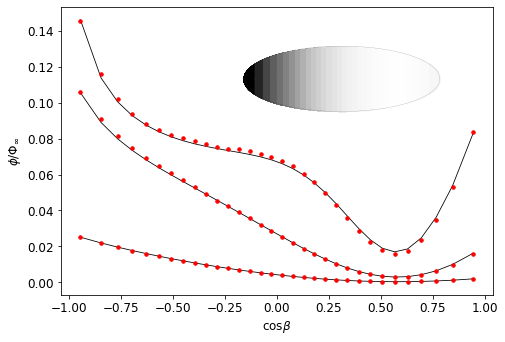

In [8]:
import matplotlib
import matplotlib.transforms as mtransforms

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

fig = plt.figure()
axs = fig.add_axes([0,0,1,1])

smark = 12
wline = 0.8
gline = 0.5
rline = 1.2
lfont = 12



K = 0.1
axs.scatter(costheta_el,big_ellipsoid.get_flux_density(K*k_t),color = "red",s=smark,zorder=2)
axs.plot(costheta_el,np.array(flx01)/(4*np.pi),color = "black",linewidth=wline,zorder=0)


K = 1
axs.scatter(costheta_el,big_ellipsoid.get_flux_density(K*k_t),color = "red",s=smark,zorder=2)
axs.plot(costheta_el,np.array(flx1)/(4*np.pi),color = "black",linewidth=wline,zorder=0)

K = 10
axs.scatter(costheta_el,big_ellipsoid.get_flux_density(K*k_t),color = "red",s=smark,zorder=2)
axs.plot(costheta_el,np.array(flx10)/(4*np.pi),color = "black",linewidth=wline,zorder=0)



axs.set_xlabel(r"$\cos \beta$",fontsize=lfont)
axs.set_ylabel(r"$\phi/ \Phi_\infty$",fontsize=lfont)

ax2 = fig.add_axes([0.4, 0.5, 0.5, 0.5])



t = np.linspace(0,2*np.pi,10000)
z = 1.913335*np.cos(t) 
r = 0.637778*np.sin(t)

ax2.plot(z,r,color="black",linewidth = 0.1)

mesh = ellipsoids3[0].settings["mesh"]


norm = matplotlib.colors.Normalize(vmin=-0.0, vmax= np.max(k_t))

cmap = matplotlib.cm.get_cmap('Greys')


for i in range(len(mesh)-1):
    mask = (z > mesh[i]) & (z <= mesh[i+1])
    ax2.fill_between(z[mask],r[mask], step="pre", alpha=1,color = cmap(norm(k_t[i])))

    

ax2.set_aspect('equal')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])



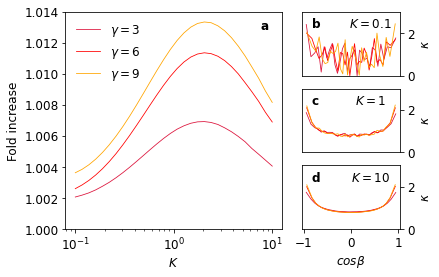

In [78]:
# Note: run the last 3 blocks first
import pickle   



# SLSQP maximization 

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 


smark = 12
wline = 0.8
gline = 0.5
rline = 1.2

lfont = 12



plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2,rowspan =3) 
plot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 3), (1, 2), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((3, 3), (2, 2), rowspan=1)
  
Ks = np.logspace(-1,1,30)

def gain_calc(obj):
    gain = [(-slsqp_opt(obj,K,K*np.ones(32)).fun)/obj.get_total_flux(K*np.ones(32)) for K in Ks]
    return gain

gain = gain_calc(ellipsoid3)
plot1.plot(Ks,gain,color = "crimson", label = r"$\gamma = 3$")

gain = gain_calc(ellipsoid6)
plot1.plot(Ks,gain,color = "red", label = r"$\gamma = 6$")


gain = gain_calc(ellipsoid9)
plot1.plot(Ks,gain,color = "orange", label = r"$\gamma = 9$")

plot1.set_ylim([1,1.014])
plot1.legend(frameon=False,loc = 'upper left',fontsize=lfont)


plot1.set_xscale("log")
plot1.set_xlabel(r"$K$",fontsize=lfont)
plot1.set_ylabel("Fold increase",fontsize=lfont)

cosb3 = ellipsoid3.midpoints/ellipsoid3.settings["ez"]
cosb6 = ellipsoid6.midpoints/ellipsoid6.settings["ez"]
cosb9 = ellipsoid9.midpoints/ellipsoid9.settings["ez"]

labelXpos = 0.70
labelYpos = 0.80

K = 0.1
plot2.plot(cosb3,slsqp_opt(ellipsoid3,K,K*np.ones(32)).x/K,color = "crimson",linewidth=wline)
plot2.plot(cosb6,slsqp_opt(ellipsoid6,K,K*np.ones(32)).x/K,color = "red",linewidth=wline)
plot2.plot(cosb9,slsqp_opt(ellipsoid9,K,K*np.ones(32)).x/K,color = "orange",linewidth=wline)
plot2.set_xticks([])
plot2.yaxis.tick_right()
plot2.yaxis.set_label_position("right")
plot2.text(labelXpos,labelYpos, r"$K = 0.1$" , horizontalalignment='center',verticalalignment='center',transform = plot2.transAxes,fontsize=lfont)



K = 1
plot3.plot(cosb3,slsqp_opt(ellipsoid3,K,K*np.ones(32)).x/K,color = "crimson",linewidth=wline)
plot3.plot(cosb6,slsqp_opt(ellipsoid6,K,K*np.ones(32)).x/K,color = "red",linewidth=wline)
plot3.plot(cosb9,slsqp_opt(ellipsoid9,K,K*np.ones(32)).x/K,color = "orange",linewidth=wline)
plot3.set_xticks([])
plot3.yaxis.tick_right()
plot3.yaxis.set_label_position("right")
plot3.text(labelXpos,labelYpos, r"$K = 1$" , horizontalalignment='center',verticalalignment='center',transform = plot3.transAxes,fontsize=lfont)



K = 10
plot4.plot(cosb3,slsqp_opt(ellipsoid3,K,K*np.ones(32)).x/K,color = "crimson",linewidth=wline)
plot4.plot(cosb6,slsqp_opt(ellipsoid6,K,K*np.ones(32)).x/K,color = "red",linewidth=wline)
plot4.plot(cosb9,slsqp_opt(ellipsoid9,K,K*np.ones(32)).x/K,color = "orange",linewidth=wline)
plot4.yaxis.tick_right()
plot4.yaxis.set_label_position("right")
plot4.text(labelXpos,labelYpos, r"$K = 10$" , horizontalalignment='center',verticalalignment='center',transform = plot4.transAxes,fontsize=lfont)



plot2.set_ylim([0,3])
plot3.set_ylim([0,3])
plot4.set_ylim([0,3])


plot2.set_ylabel(r"$\kappa$",fontsize=lfont)
plot3.set_ylabel(r"$\kappa$",fontsize=lfont)
plot4.set_ylabel(r"$\kappa$",fontsize=lfont)

plot4.set_xlabel(r"$cos\beta$",fontsize=lfont)


labels =["a","b","c","d","e","f","g","h","i","j"]


plot1.text(0.9, 0.92, labels[0], transform=plot1.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot2.text(0.1, 0.75, labels[1], transform=plot2.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot3.text(0.1, 0.75, labels[2], transform=plot3.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot4.text(0.1, 0.75, labels[3], transform=plot4.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)




plt.savefig('ellipsoid_opt2.pdf', bbox_inches='tight')



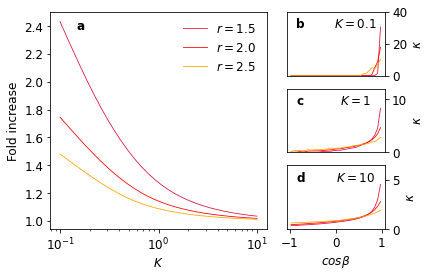

In [77]:
# Note: run the last 3 blocks first

import pickle   



# SLSQP maximization for point soruces at 1.5, 2.0, 2.5

plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2,rowspan =3) 
plot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 3), (1, 2), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((3, 3), (2, 2), rowspan=1)
  
Ks = np.logspace(-1,1,30)


def gain_calc(obj):
    gain = [(-slsqp_opt(obj,K,K*np.ones(32)).fun)/obj.get_total_flux(K*np.ones(32)) for K in Ks]
    return gain

gain15 = gain_calc(sphere15)
gain20 = gain_calc(sphere20)
gain25 = gain_calc(sphere25)


plot1.plot(Ks,gain15,color = "crimson", label = r"$r = 1.5$")
plot1.plot(Ks,gain20,color = "red", label = r"$r = 2.0$")
plot1.plot(Ks,gain25,color = "orange", label = r"$r = 2.5$")


plot1.legend(frameon=False,loc = 'upper right',fontsize=lfont)


plot1.set_xscale("log")
plot1.set_xlabel(r"$K$",fontsize=lfont)
plot1.set_ylabel("Fold increase",fontsize=lfont)

labelXpos = 0.70
labelYpos = 0.80

plot2.plot(sphere15.midpoints,slsqp_opt(sphere15,0.1,0.1*np.ones(32)).x/0.1,color = "crimson")
plot2.plot(sphere20.midpoints,slsqp_opt(sphere20,0.1,0.1*np.ones(32)).x/0.1,color = "red")
plot2.plot(sphere25.midpoints,slsqp_opt(sphere30,0.1,0.1*np.ones(32)).x/0.1,color = "orange")
plot2.set_xticks([])
plot2.yaxis.tick_right()
plot2.yaxis.set_label_position("right")
plot2.text(labelXpos,labelYpos, r"$K = 0.1$" , horizontalalignment='center',verticalalignment='center',transform = plot2.transAxes,fontsize=lfont)




plot3.plot(sphere15.midpoints,slsqp_opt(sphere15,1,1*np.ones(32)).x,color = "crimson")
plot3.plot(sphere20.midpoints,slsqp_opt(sphere20,1,1*np.ones(32)).x,color = "red")
plot3.plot(sphere25.midpoints,slsqp_opt(sphere30,1,1*np.ones(32)).x,color = "orange")
plot3.set_xticks([])
plot3.yaxis.tick_right()
plot3.yaxis.set_label_position("right")
plot3.text(labelXpos,labelYpos, r"$K = 1$" , horizontalalignment='center',verticalalignment='center',transform = plot3.transAxes,fontsize=lfont)




plot4.plot(sphere15.midpoints,slsqp_opt(sphere15,10,10*np.ones(32)).x/10,color = "crimson")
plot4.plot(sphere20.midpoints,slsqp_opt(sphere20,10,10*np.ones(32)).x/10,color = "red")
plot4.plot(sphere25.midpoints,slsqp_opt(sphere30,10,10*np.ones(32)).x/10,color = "orange")
plot4.yaxis.tick_right()
plot4.yaxis.set_label_position("right")
plot4.text(labelXpos,labelYpos, r"$K = 10$" , horizontalalignment='center',verticalalignment='center',transform = plot4.transAxes,fontsize=lfont)


plot2.set_ylabel(r"$\kappa$",fontsize=lfont)
plot3.set_ylabel(r"$\kappa$",fontsize=lfont)
plot4.set_ylabel(r"$\kappa$",fontsize=lfont)

plot2.set_ylim([0,40])
plot3.set_ylim([0,12])
plot4.set_ylim([0,6.5])


plot2.set_ylabel(r"$\kappa$",fontsize=lfont)
plot3.set_ylabel(r"$\kappa$",fontsize=lfont)
plot4.set_ylabel(r"$\kappa$",fontsize=lfont)
# plot4.set_xlabel("z")



labels =["a","b","c","d","e","f","g","h","i","j"]


plot1.text(0.12, 0.92, labels[0], transform=plot1.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot2.text(0.1, 0.75, labels[1], transform=plot2.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot3.text(0.1, 0.75, labels[2], transform=plot3.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot4.text(0.1, 0.75, labels[3], transform=plot4.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)


plot4.set_xlabel(r"$cos \beta $",fontsize=lfont)

plt.savefig('point_source_opt.pdf')


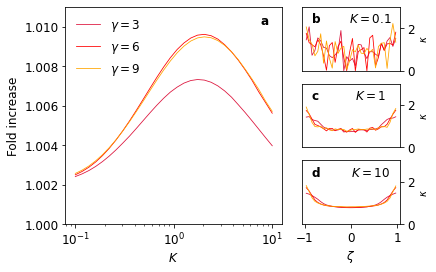

In [75]:
# SLSQP maximization for point soruces at 1.5, 2.0, 2.5

plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2,rowspan =3) 
plot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 3), (1, 2), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((3, 3), (2, 2), rowspan=1)
  
Ks = np.logspace(-1,1,30)

def gain_calc(obj):
    gain = [(-slsqp_opt(obj,K,K*np.ones(32)).fun)/obj.get_total_flux(K*np.ones(32)) for K in Ks]
    return gain

# source at 1.5
# gain = [100*(-slsqp_opt(sc3,K,K*np.ones(32)).fun - sc3.get_total_flux(K*np.ones(32)))/sc3.get_total_flux(K*np.ones(32)) for K in Ks]
gain = gain_calc(sc3)
plot1.plot(Ks,gain,color = "crimson", label = r"$\gamma = 3$")

# source at 2.0
# gain = [100*(-slsqp_opt(sc6,K,K*np.ones(32)).fun - sc6.get_total_flux(K*np.ones(32)))/sc6.get_total_flux(K*np.ones(32)) for K in Ks]
gain = gain_calc(sc6)
plot1.plot(Ks,gain,color = "red", label = r"$\gamma = 6$")


# source at 2.5
# gain = [100*(-slsqp_opt(sc9,K,K*np.ones(32)).fun - sc9.get_total_flux(K*np.ones(32)))/sc9.get_total_flux(K*np.ones(32)) for K in Ks]
gain = gain_calc(sc9)
# plot1.plot(Ks,gain)
plot1.plot(Ks,gain,color = "orange", label = r"$\gamma = 9$")


plot1.legend(frameon=False,loc = 'upper left',fontsize=lfont)


plot1.set_xscale("log")
plot1.set_xlabel(r"$K$",fontsize=lfont)
plot1.set_ylabel("Fold increase",fontsize=lfont)

labelXpos = 0.70
labelYpos = 0.80


cosb3 = sc3.midpoints/(sc3.settings["Lc"] + sc3.settings["R"] )
cosb6 = sc6.midpoints/(sc6.settings["Lc"] + sc6.settings["R"] )
cosb9 = sc9.midpoints/(sc9.settings["Lc"] + sc9.settings["R"] )



K = 0.1
plot2.plot(cosb3,slsqp_opt(sc3,K,K*np.ones(32)).x/K,color = "crimson")
plot2.plot(cosb6,slsqp_opt(sc6,K,K*np.ones(32)).x/K,color = "red")
plot2.plot(cosb9,slsqp_opt(sc9,K,K*np.ones(32)).x/K,color = "orange")
plot2.set_xticks([])
plot2.yaxis.tick_right()
plot2.yaxis.set_label_position("right")
plot2.text(labelXpos,labelYpos, r"$K = 0.1$" , horizontalalignment='center',verticalalignment='center',transform = plot2.transAxes,fontsize=lfont)



K = 1
plot3.plot(cosb3,slsqp_opt(sc3,K,K*np.ones(32)).x/K,color = "crimson")
plot3.plot(cosb6,slsqp_opt(sc6,K,K*np.ones(32)).x/K,color = "red")
plot3.plot(cosb9,slsqp_opt(sc9,K,K*np.ones(32)).x/K,color = "orange")
plot3.set_xticks([])
plot3.yaxis.tick_right()
plot3.yaxis.set_label_position("right")
plot3.text(labelXpos,labelYpos, r"$K = 1$" , horizontalalignment='center',verticalalignment='center',transform = plot3.transAxes,fontsize=lfont)



K = 10
plot4.plot(cosb3,slsqp_opt(sc3,K,K*np.ones(32)).x/K,color = "crimson")
plot4.plot(cosb6,slsqp_opt(sc6,K,K*np.ones(32)).x/K,color = "red")
plot4.plot(cosb9,slsqp_opt(sc9,K,K*np.ones(32)).x/K,color = "orange")
plot4.yaxis.tick_right()
plot4.yaxis.set_label_position("right")
plot4.text(labelXpos,labelYpos, r"$K = 10$" , horizontalalignment='center',verticalalignment='center',transform = plot4.transAxes,fontsize=lfont)


plot2.set_ylabel(r"$\kappa$")
plot3.set_ylabel(r"$\kappa$")
plot4.set_ylabel(r"$\kappa$")

plot4.set_xlabel(r"$\zeta$",fontsize=lfont)


labels =["a","b","c","d","e","f","g","h","i","j"]


plot1.set_ylim([1,1.011])

plot2.set_ylim([0,3])
plot3.set_ylim([0,3])
plot4.set_ylim([0,3])

plot1.text(0.9, 0.92, labels[0], transform=plot1.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot2.text(0.1, 0.75, labels[1], transform=plot2.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot3.text(0.1, 0.75, labels[2], transform=plot3.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot4.text(0.1, 0.75, labels[3], transform=plot4.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)

plt.savefig('spherocylinder_opt.pdf', bbox_inches='tight')


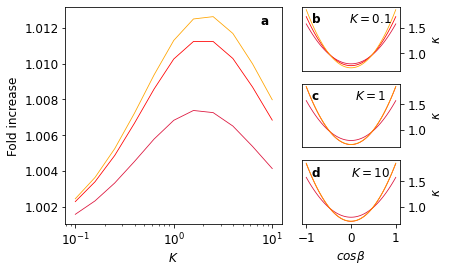

In [80]:
# PG validation
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma,lqn,eval_legendre


K = np.logspace(-1,1,11)

# aspect ratio 3

gain_3 =  [1.00157,1.00232,1.00332, 1.00452, 1.00578, 1.00683, 1.00738, 1.00726,1.00651,1.00537,1.00413]
k0_3 =  [1.05108,1.05108,1.05108,1.05108,1.05108,1.05108,1.05108,1.05108,1.05108,1.05108,1.05108]
k1_3 = [0,0,0,0,0,0,0,0,0,0,0]
k2_3 = [0.525539,0.525539,0.525539,0.525539,0.525539,0.525539,0.525539,0.525539,0.525539,0.525539,0.525539]


# aspect ratio 6

gain_6 = [1.00228, 1.00339, 1.00486, 1.00666, 1.00858, 1.01026, 1.01124, 1.01124, 1.01029, 1.00869, 1.00684]
k0_6 = [1.07518, 1.07518, 1.07518, 1.07518, 1.07518, 1.08882, 1.08882, 1.08882, 1.08882, 1.08882, 1.08882]
k1_6 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
k2_6 = [0.645105, 0.645105, 0.645105, 0.645105, 0.645105, 0.762172, 0.762172, 0.762172, 0.762172, 0.762172, 0.762172]


# aspect ratio 9
gain_9 = [1.00244, 1.00363, 1.00524, 1.00722, 1.00937, 1.0113, 1.0125, 1.01263, 1.01169, 1.00999, 1.00798]
k0_9 =[1.09251, 1.09251, 1.09251, 1.09251, 1.09251, 1.09251, 1.09251, 1.09251, 1.09251, 1.09251, 1.09251]
k1_9 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
k2_9 = [0.76476, 0.76476, 0.76476, 0.76476, 0.76476, 0.76476, 0.76476, 0.76476, 0.76476, 0.76476, 0.76476]

plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2,rowspan =3) 
plot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=1, colspan=1)
plot3 = plt.subplot2grid((3, 3), (1, 2), rowspan=1, colspan=1)
plot4 = plt.subplot2grid((3, 3), (2, 2), rowspan=1)
  
plot1.plot(K,gain_3,color = "crimson", label = r"$\gamma = 3$")
plot1.plot(K,gain_6,color = "red", label = r"$\gamma = 6$")
plot1.plot(K,gain_9,color = "orange", label = r"$\gamma = 9$")
plot1.set_xscale("log")
plot1.set_xlabel(r"$K$",fontsize=lfont)
plot1.set_ylabel("Fold increase",fontsize=lfont)

x = np.linspace(-1,1,100)

labelXpos = 0.70
labelYpos = 0.80

plot2.plot(x, k0_3[0] + k1_3[0]*eval_legendre(1,x) + k2_3[0]*eval_legendre(2,x) ,color = "crimson")
plot2.plot(x, k0_6[0] + k1_6[0]*eval_legendre(1,x) + k2_6[0]*eval_legendre(2,x) ,color = "red")
plot2.plot(x, k0_9[0] + k1_9[0]*eval_legendre(1,x) + k2_9[0]*eval_legendre(2,x) ,color = "orange")
plot2.set_xticks([])
plot2.yaxis.tick_right()
plot2.yaxis.set_label_position("right")
plot2.text(labelXpos,labelYpos, r"$K = 0.1$" , horizontalalignment='center',verticalalignment='center',transform = plot2.transAxes,fontsize=lfont)



plot3.plot(x, k0_3[5] + k1_3[5]*eval_legendre(1,x) + k2_3[5]*eval_legendre(2,x) ,color = "crimson")
plot3.plot(x, k0_6[5] + k1_6[5]*eval_legendre(1,x) + k2_6[5]*eval_legendre(2,x) ,color = "red")
plot3.plot(x, k0_9[5] + k1_9[5]*eval_legendre(1,x) + k2_9[5]*eval_legendre(2,x) ,color = "orange")
plot3.set_xticks([])
plot3.yaxis.tick_right()
plot3.yaxis.set_label_position("right")
plot3.text(labelXpos,labelYpos, r"$K = 1$" , horizontalalignment='center',verticalalignment='center',transform = plot3.transAxes,fontsize=lfont)



plot4.plot(x, k0_3[-1] + k1_3[-1]*eval_legendre(1,x) + k2_3[-1]*eval_legendre(2,x) ,color = "crimson")
plot4.plot(x, k0_6[-1] + k1_6[-1]*eval_legendre(1,x) + k2_6[-1]*eval_legendre(2,x) ,color = "red")
plot4.plot(x, k0_9[-1] + k1_9[-1]*eval_legendre(1,x) + k2_9[-1]*eval_legendre(2,x) ,color = "orange")

plot4.yaxis.tick_right()
plot4.yaxis.set_label_position("right")
plot4.text(labelXpos,labelYpos, r"$K = 10$" , horizontalalignment='center',verticalalignment='center',transform = plot4.transAxes,fontsize=lfont)

plot2.set_ylabel(r"$\kappa$",fontsize=lfont)
plot3.set_ylabel(r"$\kappa$",fontsize=lfont)
plot4.set_ylabel(r"$\kappa$",fontsize=lfont)

plot4.set_xlabel(r"$cos\beta$",fontsize=lfont)


plot1.text(0.9, 0.92, labels[0], transform=plot1.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot2.text(0.1, 0.75, labels[1], transform=plot2.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot3.text(0.1, 0.75, labels[2], transform=plot3.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)
plot4.text(0.1, 0.75, labels[3], transform=plot4.transAxes
            , fontfamily='sans serif',weight='semibold',fontsize=lfont)


plt.savefig('ellipsoid_PG_opt2.pdf', bbox_inches='tight')


In [1]:
#READ SIMULATIONS

import numpy as np
import matplotlib.pyplot as plt
import json  


# Give the path to the folder corresponding to the simulation
# The created object contains quantities such as the transition matrices and the midpoints of the bins
# Other information of the simulation are imported through settings (e.g sim.settings["mesh"])
# methods calculate the fluxes (local or global) given a descrete distribution for k (vector)
# each element in vector k corresponds to the bin with the same index
# for example a uniform distribution for a body with 32 bins will be k = np.ones(32)
class sim1_tm:
    def __init__(self, path):
        
        self.settings = json.load(open(path + "settings.txt", "r"))
        self.t_states = len(self.settings["mesh"]) - 1
        self.trsn_mtrx = np.fromfile(open(path + "transition_mtrx.dat", "r"), dtype = np.double).reshape(self.t_states + 2,self.t_states + 2)
        self.Nij = np.fromfile(open(path + "Nij.dat", "r"), dtype = np.compat.long).reshape(self.t_states + 2,self.t_states + 2)
        self.T = self.trsn_mtrx[:-1,:-1]
        self.pe= self.trsn_mtrx[:-1,-1]
        self.midpoints = np.array(self.settings["mesh"][1:] + np.array(self.settings["mesh"][0:-1]))/2

    def get_flux(self,k):
        p_abs = np.array([0] +list(0.5*np.sqrt(np.pi)*self.settings["LAMBDA"]*k))
        ImQ = np.identity(self.t_states+1) - self.T*((1-p_abs)[:,np.newaxis])   
        R = np.diag(p_abs)
        R[:,0] = self.pe*(1-p_abs)
        return np.linalg.solve(ImQ,R)[0][1:]*self.settings["R0"]
    
    def get_flux_density(self,k):
        return self.get_flux(k)/self.settings["mesh_area"]
    
    def get_total_flux(self,k):
        return np.sum(self.get_flux(k))
    
    def replace_tm(self,Nij):
        tm = np.zeros_like(Nij,dtype = float)
        for i in range(self.t_states + 1):
            tm[i] = Nij[i]/np.sum(Nij[i])
        tm[-1,-1] = 1
        self.trsn_mtrx = tm
        self.T = self.trsn_mtrx[:-1,:-1]
        self.pe= self.trsn_mtrx[:-1,-1]

In [2]:
# SAMPLING AND OPTIMIZATION

import numpy as np
import matplotlib

import numpy as np
from scipy.stats import dirichlet
from scipy.optimize import minimize


def slsqp_opt(sim,K,k0):
    def wrap_phi(k,sim):
        return -sim.get_total_flux(k)
    
    cons = [{"type": "eq", "fun": lambda x: np.ones(sim.t_states) @ x - np.array([K*sim.t_states])}]
    return minimize(wrap_phi, args= (sim), x0=k0, bounds=[(0,K*sim.t_states) for i in range(sim.t_states)], constraints=cons,method="SLSQP", options={ 'maxiter': 100, 'ftol': 1e-08, 'iprint': 1, 'disp': False, 'eps': 0.01, 'finite_diff_rel_step': None} )


In [3]:
# PG method for uniform ellipsoid

from scipy.special import gamma,lqn,eval_legendre

def fln_el(elpsd,k,nmax):
    
    def Vn(x,n):
        if n==0:
            return 2*np.arcsin(1/x)
        elif n==1:
            return ((3/2)*x**2 -1)*np.arcsin(1/x) - (3/2)*np.sqrt(x*x-1)
        else:
            frs = Vn(x,n-1)*(4*n-3)*((4*n-1)*(4*n-5)*x**2 - 2*(4*n**2-6*n+1))/((4*n-5)*(2*n)**2)
            scd = Vn(x,n-2)*((4*n-1)*(2*n-3)**2)/((4*n-5)*(2*n)**2)
            return frs-scd

    def alpha(i):
        return gamma(i+1/2)/(np.sqrt(np.pi)*gamma(i+1))

    def Bmnk(m,n,k):
        return (alpha(k)*alpha(m-k)*alpha(n-k)*(2*m+2*n-4*k+1))/(alpha(m+n-k)*(2*m+2*n-2*k+1))
    def Fmn(x,m,n):
        topsum = int(np.min([m,n]))
        F = 0
        for k in range(topsum+1):
            F+= Bmnk(m,n,k)*Vn(x,(m+n)/2 -k)
        return F

    matrix = np.zeros((nmax+1,nmax+1))

    b     = elpsd.settings["ez"]
    a     = elpsd.settings["er"]
    ae    =     np.sqrt(b*b-a*a)
    cosh = b/ae
    sinh = np.sqrt(cosh**2-1)
    Qn = lqn(2*nmax+2,cosh)

    for i in range(nmax+1):
        for j in range(nmax+1):
            if i == j:
                matrix[i,j] += Qn[0][2*i]/(4*i+1)
            matrix[i,j] += - (1/(2*k*ae))* Fmn(cosh,2*i,2*j)*sinh*Qn[1][2*j]

    rhs = np.zeros(nmax+1)
    rhs[0] = 1
    solution = np.linalg.solve(matrix, rhs)
    return solution[0]*ae,solution

def fl_loc(elpsd,k,costheta,nmax):
    An = fln_el(elpsd,k,nmax)[1]
    

    b     = elpsd.settings["ez"]
    a     = elpsd.settings["er"]
    ae    =     np.sqrt(b*b-a*a)
    cosh = b/ae
    sinh = np.sqrt(cosh**2-1)
    Qn = lqn(2*nmax+2,cosh)
    
    summation = 0
    for i in range(nmax+1):
        summation += An[i]*eval_legendre(2*i,costheta)*Qn[1][2*i]
    
    return (sinh/(ae*np.sqrt(cosh**2-costheta**2)))*summation

def fl0_el(elpsd,k):
    b     = elpsd.settings["ez"]
    a     = elpsd.settings["er"]
    ae    = np.sqrt(b*b-a*a)
    return ae/(0.5*np.log((1+ae/b)/(1-ae/b))+np.arcsin(ae/b)/(k*b*np.sqrt(1-(ae/b)**2)))